In [9]:
import pandas as pd
import numpy as np
from plotnine import *
from itertools import combinations
# from patchworklib import wrap_plots
from patchworklib import Brick


Note: made these functions with chatgpt. 

They are not working because it seems the AI has confused some of the R functions with what is available in tthe Python patchwork package

It seems like the main issue is that the way R handles objects and strings allows the plots to more easily be arranged in the matrix.

I wonder how the seaborn and pandas packages make their scatter plot matrixes?

In [6]:
def ggpairs(data, size=1.5):
    """
    Create a pair plot (scatterplot matrix) using plotnine.
    Args:
        data (pd.DataFrame): DataFrame containing numeric variables to plot.
        size (float): Size multiplier for the plots.
    Returns:
        ggplot: A combined ggplot object showing pairwise relationships.
    """
    # Filter numeric columns
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    plots = []
    n_cols = len(numeric_cols)

    # Generate all combinations for lower triangular plots
    for i, col_x in enumerate(numeric_cols):
        for j, col_y in enumerate(numeric_cols):
            if i == j:
                # Diagonal: Histogram
                plot = (
                    ggplot(data, aes(x=col_x)) +
                    geom_histogram(bins=20, fill="blue", alpha=0.7) +
                    theme_minimal() +
                    labs(x="", y="") +
                    theme(axis_text_x=element_blank(),
                          axis_text_y=element_blank(),
                          axis_ticks_major=element_blank())
                )
            elif i > j:
                # Lower triangle: Scatterplot
                plot = (
                    ggplot(data, aes(x=col_x, y=col_y)) +
                    geom_point(alpha=0.5, size=size) +
                    theme_minimal() +
                    labs(x="", y="") +
                    theme(axis_text_x=element_blank(),
                          axis_text_y=element_blank(),
                          axis_ticks_major=element_blank())
                )
            else:
                # Upper triangle: Blank plot
                plot = ggplot() + theme_void()
            plots.append(plot)

    return plots


def arrange_plots(plots, cols):
    """
    Arrange plots into a matrix layout using patchworklib.
    Args:
        plots (list): A list of tuples (row, col, plot).
        cols (list): List of column names.
    Returns:
        patchwork object: Arranged plots in a grid.
    """
    # Create an empty layout grid
    grid = np.full((len(cols), len(cols)), None)

    # Populate grid with plots
    for i, j, plot in plots:
        grid[i, j] = plot

    # Flatten the grid and wrap with patchwork
    flat_plots = [p for row in grid for p in row if p is not None]
    return wrap_plots(flat_plots, ncol=len(cols))
    

In [10]:
def ggpairs(data):
    """
    Create a pair plot (scatterplot matrix) using plotnine and patchworklib.
    Args:
        data (pd.DataFrame): DataFrame containing numeric variables to plot.
    Returns:
        patchworklib.Bricks: A combined plot arranged in a matrix layout.
    """
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    n = len(numeric_cols)
    plot_matrix = []

    for i in range(n):
        row = []
        for j in range(n):
            x = numeric_cols[j]
            y = numeric_cols[i]
            if i == j:
                # Diagonal: Histogram
                p = (
                    ggplot(data, aes(x=x)) +
                    geom_histogram(bins=20, fill="blue", alpha=0.7) +
                    theme_minimal() +
                    labs(x="", y="") +
                    theme(
                        axis_text_x=element_blank(),
                        axis_text_y=element_blank(),
                        axis_ticks_major=element_blank()
                    )
                )
            else:
                # Off-diagonal: Scatterplot
                p = (
                    ggplot(data, aes(x=x, y=y)) +
                    geom_point(alpha=0.5) +
                    theme_minimal() +
                    labs(x="", y="") +
                    theme(
                        axis_text_x=element_blank(),
                        axis_text_y=element_blank(),
                        axis_ticks_major=element_blank()
                    )
                )
            row.append(Brick(p))
        plot_matrix.append(row)

    # Combine plots using patchworklib
    combined_plot = plot_matrix[0][0]
    for i in range(n):
        row_plot = plot_matrix[i][0]
        for j in range(1, n):
            row_plot |= plot_matrix[i][j]
        if i == 0:
            combined_plot = row_plot
        else:
            combined_plot /= row_plot

    return combined_plot

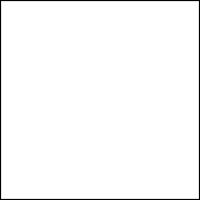

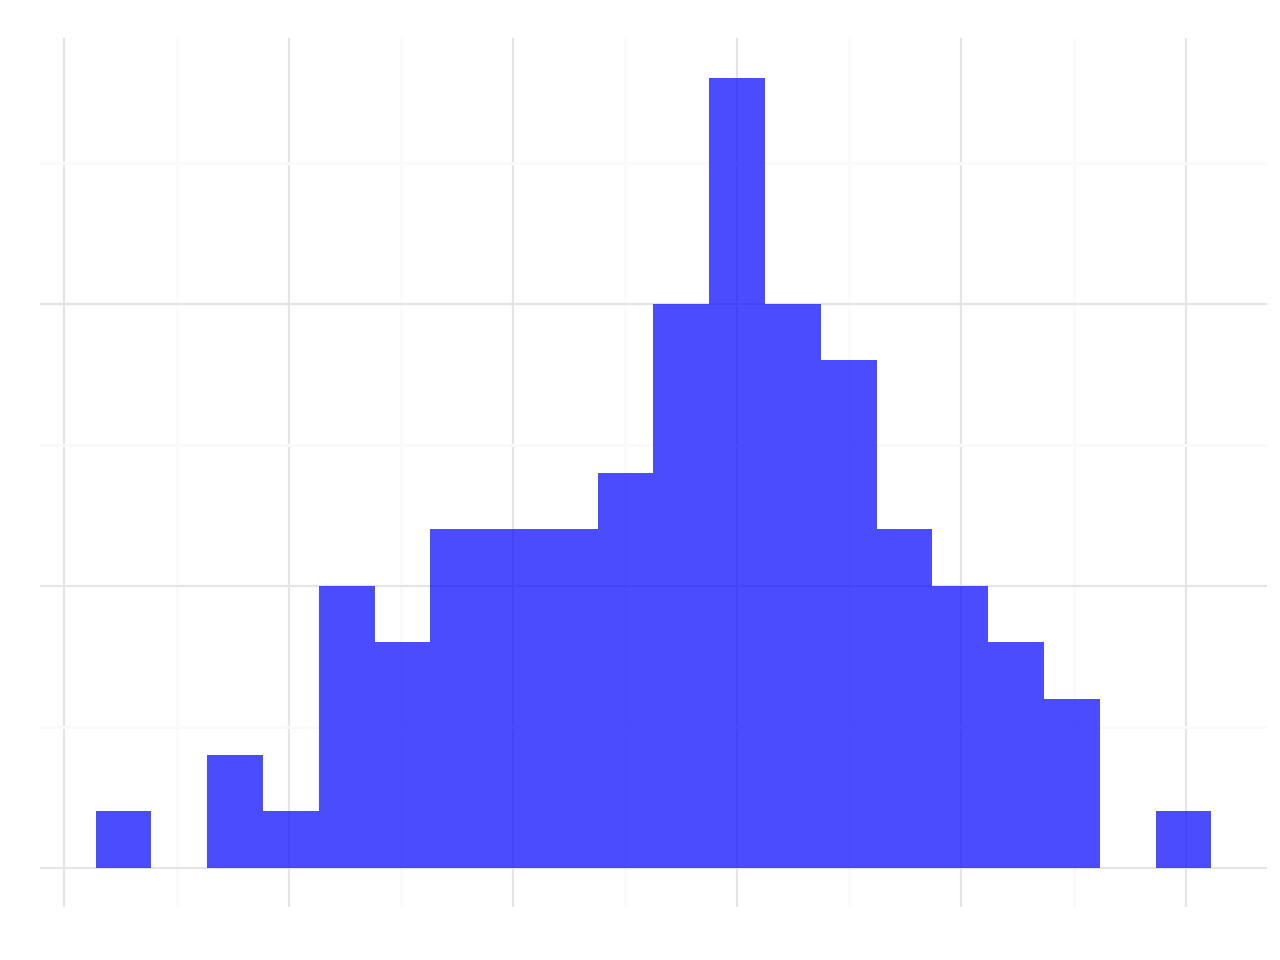

TypeError: can only concatenate str (not "ggplot") to str

In [11]:
# Example usage
data = pd.DataFrame({
    "A": np.random.randn(100),
    "B": np.random.randn(100) * 2,
    "C": np.random.randn(100) * 0.5,
})

plots = ggpairs(data)
# Use patchwork or other tools to arrange them into a matrix layout.
plots